In [172]:
from useful_scit.imps import *

In [176]:
path = '/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10'
dom = 'd01'
header = 'header_'
flx = 'flxout'

In [177]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
import flexpart_management.modules.flx_array as fa

In [179]:
head_ds = fa.import_head_ds(path,dom)

/Volumes/mbProD/Downloads/flex_out/run_2019-06-02_20-42-05_/2017-12-10/header_d01.nc


In [180]:
file_ds_list = fa.import_file_ds_list(path,dom)

In [181]:
ds_con = fa.concat_file_ds_list(file_ds_list)

KeyboardInterrupt: 

In [ ]:
ds_con1 = fa.convert_ds_time_format(ds_con)

In [ ]:
ds_join = fa.join_head(ds_con1,head_ds)

In [ ]:
ds1 = fa.add_release_time_dim(ds_join,head_ds)

In [ ]:
ds2 = fa.assign_vars_to_cords(ds1)
ds2 = fa.add_lat_lot(ds2)
ds2 = fa.add_zmid(ds2)
ds2 = fa.add_zbot(ds2)
ds2 = fa.add_zlength_m(ds2)

In [ ]:
ds2

In [215]:
ds2_1 = ds2.copy()
ds2_1['CONC']=1/ds2_1.CONC.where(ds2_1.CONC>0.0000)

In [118]:
dsV = ds2.GRIDAREA*ds2.ZLEN_M

In [200]:
dsC = ds2.CONC.isel(Time=-5)
dsC = dsC.where(dsC>0.000)

In [205]:
dcC_1 = (1/dsC)

In [210]:
(dcC_1/dsV).sum()

<xarray.DataArray ()>
array(8.089301e-05)
Coordinates:
    Time     datetime64[ns] 2017-12-05T20:00:00

In [213]:
(dcC_1*dsV).sum()/3600/3600

<xarray.DataArray ()>
array(9.828812e+08)
Coordinates:
    Time     datetime64[ns] 2017-12-05T20:00:00

In [190]:
dsS = dsC / dsV
dsS_1 = 1/dsS

In [191]:
V_res = (68.14-68.118)* 100000 * \
(16.355-16.335)*100000 * \
300*1000e-14

In [192]:
V_res

0.01320000000000306

In [199]:
(dsC).sum()/3600

<xarray.DataArray 'CONC' ()>
array(1.441499)
Coordinates:
    Time     datetime64[ns] 2017-12-05T20:00:00

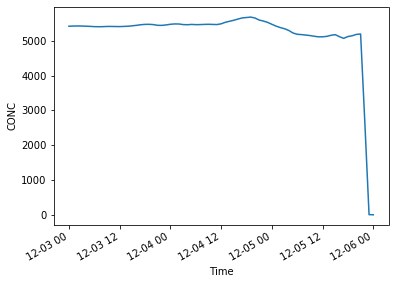

In [194]:
ds2.CONC.sum(dim=['bottom_top','south_north','west_east']).plot()

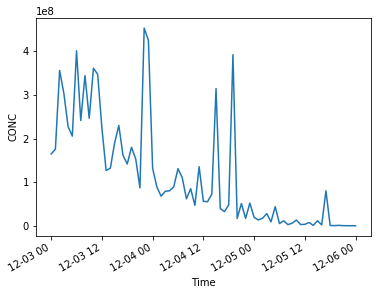

In [216]:
ds2_1.CONC.sum(dim=['bottom_top','south_north','west_east']).plot()

In [44]:
head_ds.XLONG.isel(south_north=1)

<xarray.DataArray 'XLONG' (west_east: 468)>
array([-89.338974, -89.2403  , -89.14163 , ..., -43.45837 , -43.359703,
       -43.261036], dtype=float32)
Coordinates:
    XLONG    (west_east) float32 ...
    XLAT     (west_east) float32 ...
Dimensions without coordinates: west_east
Attributes:
    description:  Longitude of center grid, west is negative
    units:        degree_east

[(0.9985236447520185, 0.9297808535178778, 0.8968858131487889),
 (0.9970472895040369, 0.8987773933102653, 0.8525951557093425),
 (0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9921107266435987, 0.8050288350634371, 0.726320645905421),
 (0.9891580161476355, 0.75040369088812, 0.6539792387543253),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9880661284121492, 0.5657823913879277, 0.44029219530949637),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.985113417916186, 0.4476739715494041, 0.32218377547097277),
 (0.974717416378316, 0.37810073048827375, 0.26620530565167244),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.9392848904267589, 0.23932333717800847, 0.17762399077277968),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.7785467128027681, 0.08996539792387544, 0.110

In [92]:
cmap = mpl.colors.ListedColormap(sns.color_palette('Reds',20))

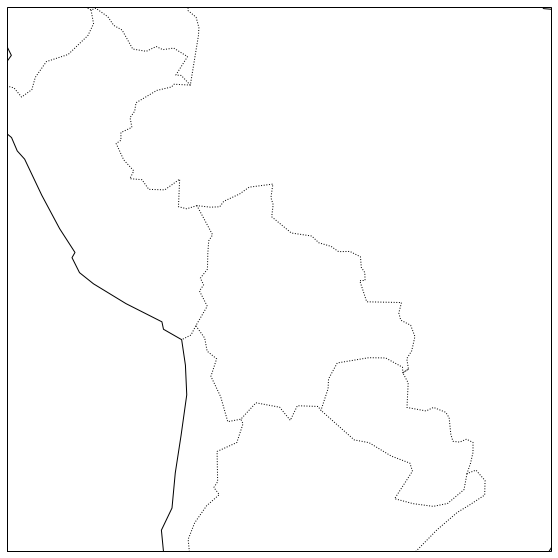

In [101]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-80, -50, -30, 0], crs=ccrs.PlateCarree())

# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)




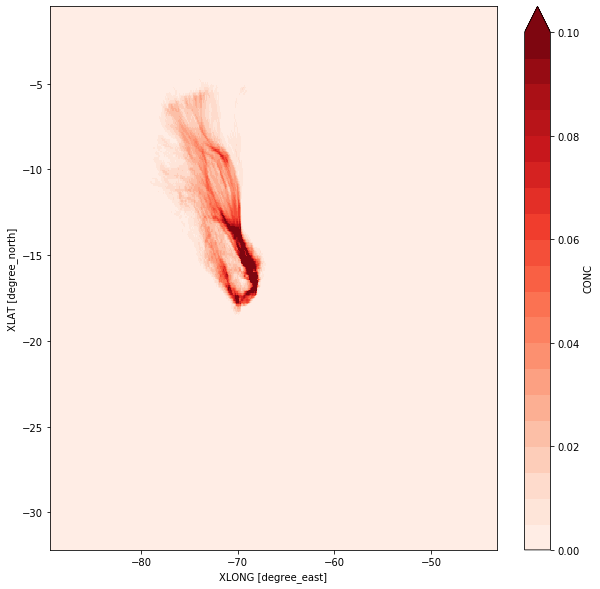

In [105]:
ds2.CONC.mean(dim=['Time','bottom_top']).plot(vmax=.1,x='XLONG',y='XLAT',cmap=cmap,figsize=(10,10))

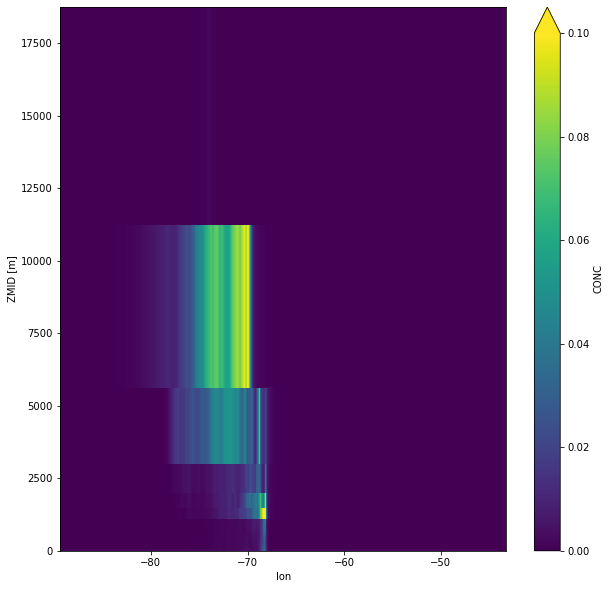

In [56]:
ds2.CONC.mean(dim=['Time','south_north']).plot(x='lon',y='ZMID',vmax=.1,figsize=(10,10))

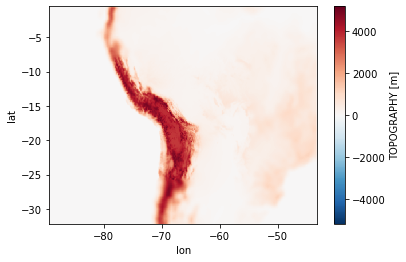

In [70]:
ds2.TOPOGRAPHY.plot(x='lon',y='lat')

In [71]:
ds2

<xarray.Dataset>
Dimensions:       (Time: 73, arrival_time: 1, bottom_top: 16, release_time: 1, south_north: 340, west_east: 468)
Coordinates:
  * Time          (Time) datetime64[ns] 2017-12-03 ... 2017-12-06
    XLONG         (south_north, west_east) float32 -89.338974 ... -43.261036
    XLAT          (south_north, west_east) float32 -32.141644 ... -0.528141
    TOPOGRAPHY    (south_north, west_east) float32 ...
    GRIDAREA      (south_north, west_east) float32 ...
    ZTOP          (bottom_top) float32 100.0 200.0 300.0 ... 10000.0 20000.0
  * release_time  (release_time) datetime64[ns] 2017-12-06
    lat           (south_north) float32 -32.14164 -32.048393 ... -0.528141
    lon           (west_east) float32 -89.339325 -89.24025 ... -43.260952
    ZMID          (bottom_top) float64 50.0 150.0 250.0 ... 7.5e+03 1.5e+04
Dimensions without coordinates: arrival_time, bottom_top, south_north, west_east
Data variables:
    CONC          (arrival_time, Time, bottom_top, south_north, west_e

In [72]:
qa = xla.quantile([.2,.5,.8],'west_east')

NameError: name 'xla' is not defined

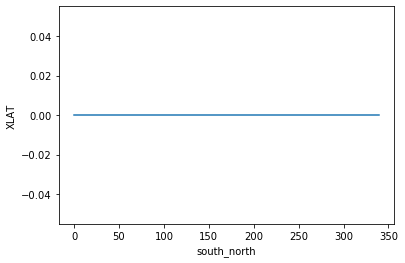

In [277]:
(qa.isel(quantile=0)-qa.isel(quantile=-1)).plot()

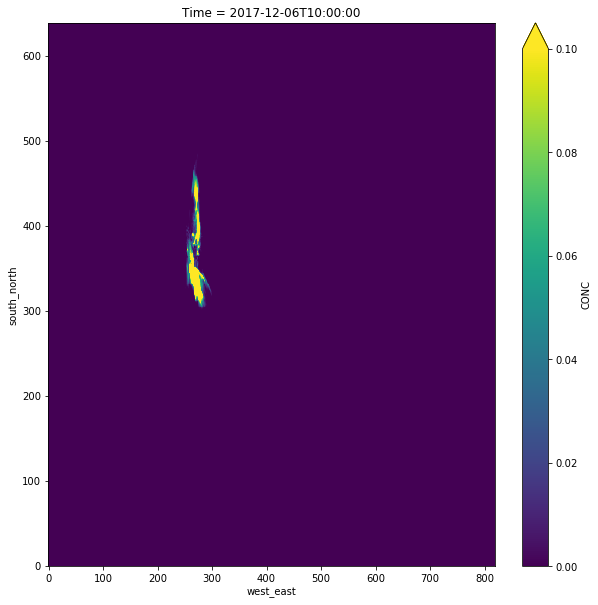

In [329]:
ds2.CONC.isel(Time=-5).mean(dim='bottom_top').plot(vmax=.1,figsize=(10,10))

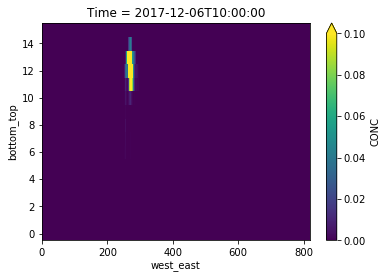

In [330]:
ds2.CONC.isel(Time=-5).mean(dim='south_north').plot(vmax=0.1)

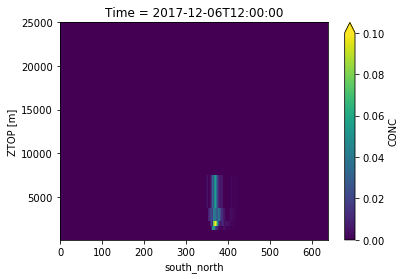

In [331]:
ds2.CONC.isel(Time=-3).mean(dim='west_east').plot(vmax=0.1,x='south_north',y='ZTOP')

In [335]:
fa.add_lat_lot(ds2)

<xarray.Dataset>
Dimensions:       (Time: 73, arrival_time: 1, bottom_top: 16, release_time: 1, south_north: 639, west_east: 819)
Coordinates:
  * Time          (Time) datetime64[ns] 2017-12-03T14:00:00 ... 2017-12-06T14:00:00
    XLONG         (south_north, west_east) float32 -70.88807 ... 9.822319
    XLAT          (south_north, west_east) float32 -20.502567 ... 38.994232
    TOPOGRAPHY    (south_north, west_east) float32 ...
    GRIDAREA      (south_north, west_east) float32 ...
    ZTOP          (bottom_top) float32 ...
  * release_time  (release_time) datetime64[ns] 2017-12-06T14:00:00
    lat           (south_north) float32 -20.502565 -20.409315 ... 38.994232
    lon           (west_east) float32 -70.88786 -70.78914 ... 9.723635 9.822275
Dimensions without coordinates: arrival_time, bottom_top, south_north, west_east
Data variables:
    CONC          (arrival_time, Time, bottom_top, south_north, west_east) float32 0.0 ... 0.0
Attributes:
    SIMULATION_START_DATE:       20171206


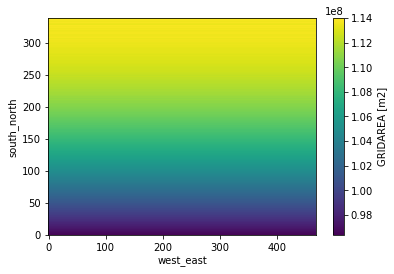

In [73]:
ds2.GRIDAREA.plot()

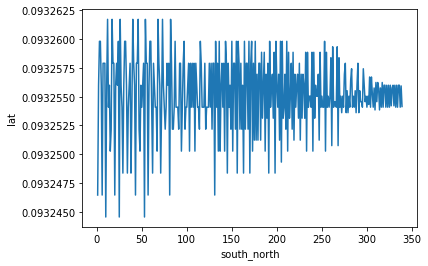

In [76]:
res = ds2.lat - ds2.lat.shift(south_north=1)
res.plot()

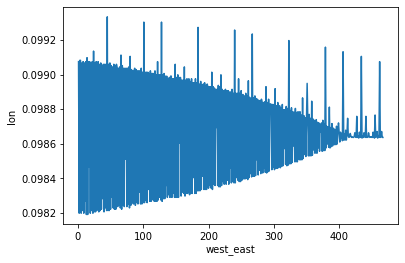

In [67]:
res = ds2.lon - ds2.lon.shift(west_east=1)
res.plot()

In [79]:
ds2.lat.min()
ds2.lat.max()

<xarray.DataArray 'lat' ()>
array(-0.528141, dtype=float32)

In [82]:
.099*100

9.9

In [106]:
ds2.CONC

<xarray.DataArray 'CONC' (arrival_time: 1, Time: 73, bottom_top: 16, south_north: 340, west_east: 468)>
array([[[[[0., ..., 0.],
          ...,
          [0., ..., 0.]],

         ...,

         [[0., ..., 0.],
          ...,
          [0., ..., 0.]]],


        ...,


        [[[0., ..., 0.],
          ...,
          [0., ..., 0.]],

         ...,

         [[0., ..., 0.],
          ...,
          [0., ..., 0.]]]]], dtype=float32)
Coordinates:
  * Time        (Time) datetime64[ns] 2017-12-03 ... 2017-12-06
    XLONG       (south_north, west_east) float32 -89.338974 ... -43.261036
    XLAT        (south_north, west_east) float32 -32.141644 ... -0.528141
    TOPOGRAPHY  (south_north, west_east) float32 ...
    GRIDAREA    (south_north, west_east) float32 ...
    ZTOP        (bottom_top) float32 100.0 200.0 300.0 ... 10000.0 20000.0
    lat         (south_north) float32 -32.14164 -32.048393 ... -0.528141
    lon         (west_east) float32 -89.339325 -89.24025 ... -43.260952
    ZMID    

In [107]:
ds2

<xarray.Dataset>
Dimensions:       (Time: 73, arrival_time: 1, bottom_top: 16, release_time: 1, south_north: 340, west_east: 468)
Coordinates:
  * Time          (Time) datetime64[ns] 2017-12-03 ... 2017-12-06
    XLONG         (south_north, west_east) float32 -89.338974 ... -43.261036
    XLAT          (south_north, west_east) float32 -32.141644 ... -0.528141
    TOPOGRAPHY    (south_north, west_east) float32 ...
    GRIDAREA      (south_north, west_east) float32 ...
    ZTOP          (bottom_top) float32 100.0 200.0 300.0 ... 10000.0 20000.0
  * release_time  (release_time) datetime64[ns] 2017-12-06
    lat           (south_north) float32 -32.14164 -32.048393 ... -0.528141
    lon           (west_east) float32 -89.339325 -89.24025 ... -43.260952
    ZMID          (bottom_top) float64 50.0 150.0 250.0 ... 7.5e+03 1.5e+04
Dimensions without coordinates: arrival_time, bottom_top, south_north, west_east
Data variables:
    CONC          (arrival_time, Time, bottom_top, south_north, west_e

In [217]:
path = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_1_1'

In [258]:
file = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_1_1/flxout_d02_20171209_170000.nc'
ds11 = xr.open_dataset(file)

In [259]:
file = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_2_1/flxout_d02_20171209_170000.nc'
ds21 = xr.open_dataset(file)

file = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_2_2/flxout_d02_20171209_170000.nc'
ds22 = xr.open_dataset(file)

file = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_1_2/flxout_d02_20171209_170000.nc'
ds12 = xr.open_dataset(file)

(array([ 136.,  264., 1601., 2483., 3257., 3062., 3666., 7597., 5480.,
        1937.]),
 array([0.41649404, 0.45893356, 0.50137305, 0.5438126 , 0.5862521 ,
        0.6286916 , 0.67113113, 0.7135706 , 0.7560101 , 0.79844964,
        0.84088916], dtype=float32),
 <a list of 10 Patch objects>)

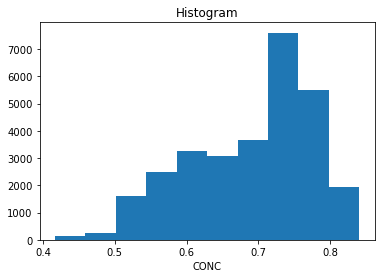

In [260]:
(ds21.CONC/ds11.CONC).isel(releases=1).plot()

(array([ 132.,  314., 1635., 2718., 3157., 3112., 4018., 8102., 4910.,
        1385.]),
 array([0.5943089 , 0.65564656, 0.7169842 , 0.77832186, 0.8396595 ,
        0.90099716, 0.96233475, 1.0236725 , 1.08501   , 1.1463478 ,
        1.2076854 ], dtype=float32),
 <a list of 10 Patch objects>)

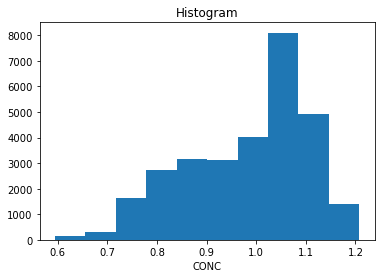

In [261]:
(ds22.CONC/ds11.CONC).isel(releases=1).plot()

(array([ 153.,  982., 3429., 7641., 8666., 5079., 2218.,  889.,  361.,
          65.]),
 array([0.6893061 , 0.6921672 , 0.69502836, 0.6978895 , 0.70075065,
        0.70361185, 0.706473  , 0.70933414, 0.7121953 , 0.7150564 ,
        0.71791756], dtype=float32),
 <a list of 10 Patch objects>)

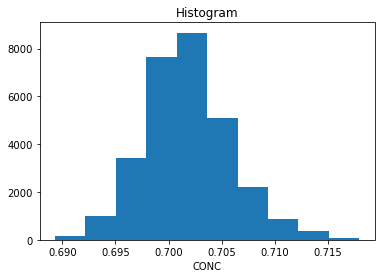

In [262]:
(ds21.CONC/ds22.CONC).isel(releases=1).plot()

(array([ 136.,  271., 1571., 2468., 3288., 3122., 3624., 7650., 5381.,
        1972.]),
 array([0.29188073, 0.3217175 , 0.35155427, 0.38139108, 0.41122785,
        0.44106463, 0.4709014 , 0.5007382 , 0.530575  , 0.56041175,
        0.5902485 ], dtype=float32),
 <a list of 10 Patch objects>)

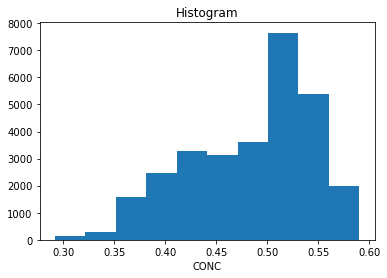

In [263]:
(ds21.CONC/ds12.CONC).isel(releases=1).plot()

(array([ 153.,  983., 3432., 7648., 8677., 5066., 2215.,  883.,  361.,
          65.]),
 array([0.68931055, 0.6921723 , 0.695034  , 0.6978957 , 0.70075744,
        0.7036192 , 0.7064809 , 0.70934266, 0.71220434, 0.7150661 ,
        0.7179278 ], dtype=float32),
 <a list of 10 Patch objects>)

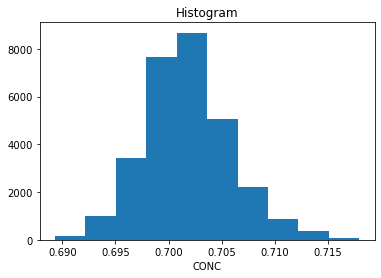

In [264]:
(ds11.CONC/ds12.CONC).isel(releases=1).plot()

(array([ 136.,  264., 1601., 2482., 3256., 3064., 3666., 7597., 5480.,
        1937.]),
 array([0.4164941, 0.4589336, 0.5013731, 0.5438126, 0.5862521, 0.6286916,
        0.6711311, 0.7135706, 0.7560101, 0.7984496, 0.8408891],
       dtype=float32),
 <a list of 10 Patch objects>)

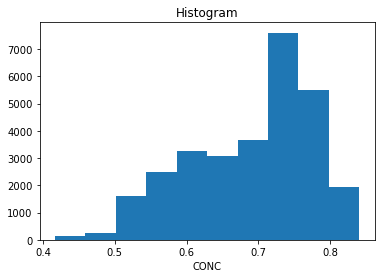

In [265]:
(ds22.CONC/ds12.CONC).isel(releases=1).plot()

(array([ 5280., 10739.,  4696.,  3166.,  2845.,  1793.,   654.,   170.,
           84.,    56.]),
 array([0.8280303 , 0.91348994, 0.9989496 , 1.0844092 , 1.1698688 ,
        1.2553285 , 1.3407881 , 1.4262478 , 1.5117074 , 1.5971671 ,
        1.6826267 ], dtype=float32),
 <a list of 10 Patch objects>)

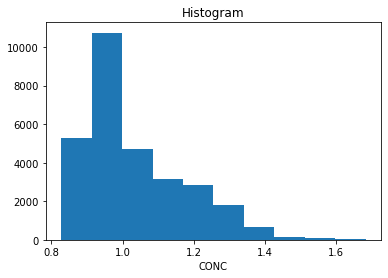

In [266]:
(ds11.CONC/ds22.CONC).isel(releases=1).plot()

In [267]:
ds11.CONC.isel(releases=0).sum()

<xarray.DataArray 'CONC' ()>
array(1154.4707, dtype=float32)

In [268]:
ds22.CONC.isel(releases=0).sum()

<xarray.DataArray 'CONC' ()>
array(1061.919, dtype=float32)

In [269]:
ds12.CONC.isel(releases=0).sum()

<xarray.DataArray 'CONC' ()>
array(1634.8218, dtype=float32)

In [270]:
ds21.CONC.isel(releases=0).sum()

<xarray.DataArray 'CONC' ()>
array(749.88477, dtype=float32)

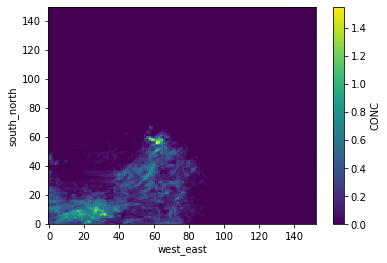

In [271]:
ds22.CONC.isel(releases=0).sum(dim=['bottom_top']).plot()

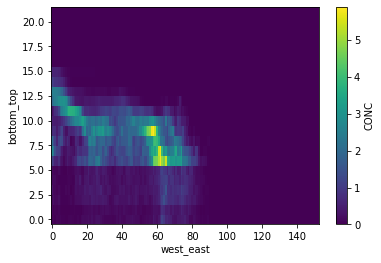

In [276]:
ds22.CONC.isel(releases=0).sum(dim=['south_north']).plot(x='west_east')

In [254]:
hp = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_1_1/header_d01.nc'

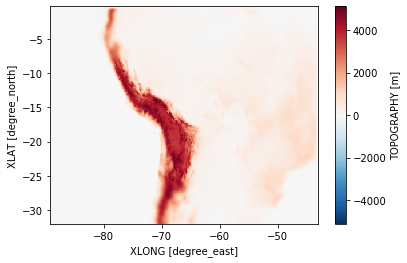

In [256]:
xr.open_dataset(hp).TOPOGRAPHY.plot(x='XLONG',y='XLAT')

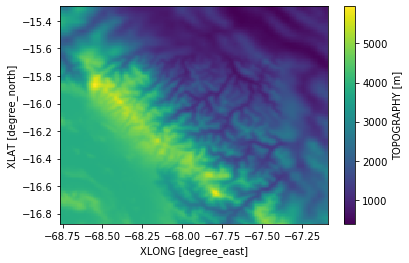

In [257]:
hp = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_1_1/header_d02.nc'
xr.open_dataset(hp).TOPOGRAPHY.plot(x='XLONG',y='XLAT')

In [537]:
path = '/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_2_2/'
dom = 'd02'

In [538]:
head_ds = fa.import_head_ds(path,dom)

/Volumes/mbProD/Downloads/flexpart/runs/run_2019-05-31_16-01-17_2_2/header_d02.nc


In [539]:
file_ds_list = fa.import_file_ds_list(path,dom)

In [540]:
ds_con = fa.concat_file_ds_list(file_ds_list)

In [541]:
ds_con1 = fa.convert_ds_time_format(ds_con)

In [542]:
ds_join = fa.join_head(ds_con1,head_ds,ageclass=0,releases=slice(0,None))

In [543]:
ds2 = ds_join
# ds2 = fa.add_release_time_dim(ds2,head_ds)
ds2 = fa.assign_vars_to_cords(ds2)
ds2 = fa.add_lat_lot(ds2)
ds2 = fa.add_zmid(ds2)
ds2 = fa.add_zbot(ds2)
ds2 = fa.add_zlength_m(ds2)
ds2 = fa.add_alt_m(ds2)
ds2 = fa.add_volume(ds2)

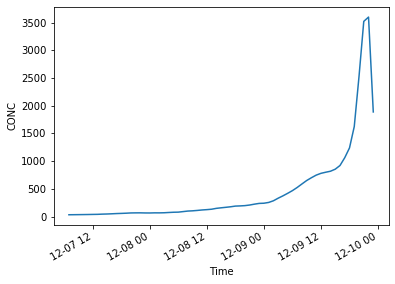

In [544]:
ds2.isel(releases=0).sum(dim=['south_north','bottom_top','west_east']).CONC.plot()

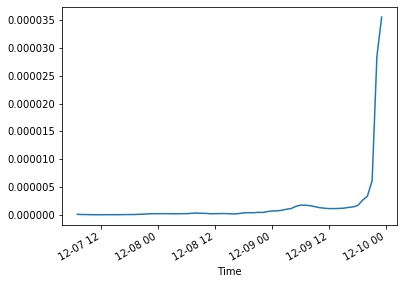

In [545]:
ds_ = ds2.isel(releases=0)
(ds_.CONC/ds_.VOL).sum(dim=['south_north','bottom_top','west_east']).plot()

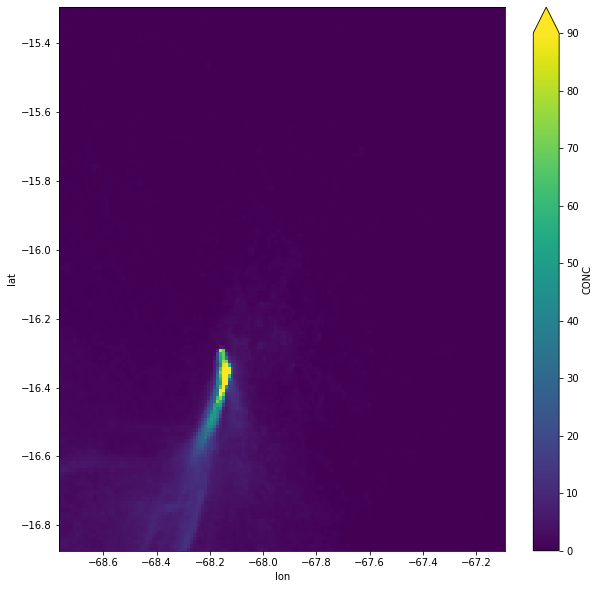

In [592]:
ds2.isel(releases=1).sum(dim=['bottom_top','Time']).CONC.plot(x='lon',y='lat',vmax=90,figsize=(10,10))

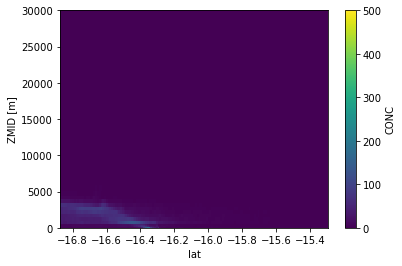

In [547]:
ds2.isel(releases=1).sum(dim=['west_east','Time']).CONC.plot(x='lat',y='ZMID',vmax=500)

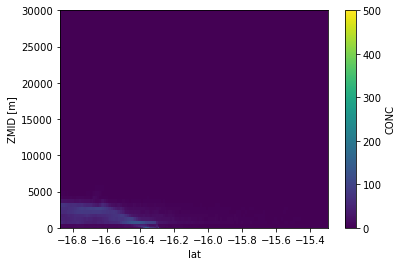

In [548]:
ds2.isel(releases=0).sum(dim=['west_east','Time']).CONC.plot(x='lat',y='ZMID',vmax=500)

In [559]:
ds2['alt']=ds2.ALT

In [560]:
import wrf

In [594]:
ds22=ds2.copy()
dc = ds22.coords
ds22 = ds2.drop(dc).isel(Time=[-20,-1],releases=1)
ds22['con/vol'] = (ds22.CONC/ds2.VOL)
co = ds22.coords
ds22 = ds22.drop(co)

In [595]:
ds22['alt']=ds22.alt.transpose('bottom_top','south_north','west_east')

In [596]:
nds = wrf.interplevel(ds22['con/vol'],ds22.alt,desiredlev=np.arange(0,20000,100))

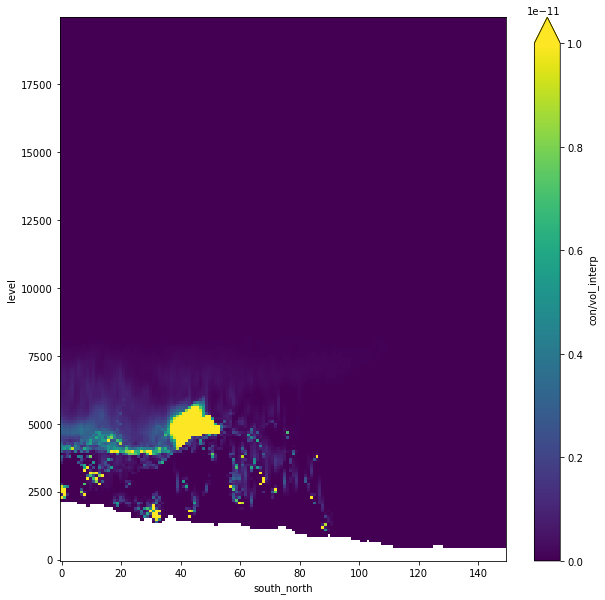

In [597]:
nds.mean(dim=['west_east','Time']).plot(vmax = 1e-11,figsize=(10,10))

In [513]:
la, lo = -16.355000,-68.140000
dis = np.sqrt((la-ds2.lat)**2+(lo-ds2.lon)**2)
mi =dis.min()

In [525]:
min_loc = dis.where(dis==mi).dropna(fa.SN,'all').dropna(fa.WE,'all')

In [532]:
dsll = ds2[fa.TOPO].swap_dims({fa.WE:'lon',fa.SN:'lat'})

In [536]:
dsll.interp(lat=la,lon=lo)

<xarray.DataArray 'TOPOGRAPHY' ()>
array(4656.198893)
Coordinates:
    XLONG       float64 -68.14
    XLAT        float64 -16.35
    TOPOGRAPHY  float64 4.656e+03
    GRIDAREA    float64 1.108e+08
    lat         float64 -16.36
    lon         float64 -68.14
Attributes:
    description:  TERRAIN ELEVATION ABOVE SEA LEVEL
    units:        m

In [5]:
import flexpart_management.modules.create_release_file as rf

In [6]:
dtm = dt.datetime(2017,1,1,1,1,1)

In [7]:
rf.format_dt_to_str(dtm)

'20170101 010101'

In [8]:
dc = dict(start_dt_rel=dtm, end_dt_rel=dtm)

In [9]:
df =rf.create_dic_range(
    d_start = dt.datetime(2018,1,1,1,0,0),
    d_end   = dt.datetime(2018,1,1,10,0,0),
    base_dict = {}

)

st= df[rf.RELEASE_DIC_STR_KEY]

In [11]:
st.iloc[0]

'20180101 010000       ID1, IT1        beginning date and time of release\n  20180101 020000       ID2, IT2        ending date and time of release\n  -68.140000            XPOINT1 (real)  longitude [deg] of lower left corner\n  -16.355000            YPOINT1 (real)  latitude [deg] of lower left corner\n  -68.118000            XPOINT2 (real)  longitude [deg] of upper right corner\n  -16.335000            YPOINT2 (real)  latitude [DEG] of upper right corner\n  1                     KINDZ  (int)  1 for m above ground, 2 for m above sea level, 3 pressure\n  0.0                 ZPOINT1 (real)  lower z-level\n  10.0                ZPOINT2 (real)  upper z-level\n  10000                 NPART (int)     total number of particles to be released\n  1000.0                XMASS (real)    total mass emitted\n  dummy_test20180101_01    NAME OF RELEASE LOCATION'

In [12]:
join(['s','b'])

NameError: name 'join' is not defined

In [23]:
str_out = ''
for s in st.values:
    str_out = str_out+'\n'+s
str_out = str_out[1:]

In [24]:
str_out

'20180101 010000       ID1, IT1        beginning date and time of release\n  20180101 020000       ID2, IT2        ending date and time of release\n  -68.140000            XPOINT1 (real)  longitude [deg] of lower left corner\n  -16.355000            YPOINT1 (real)  latitude [deg] of lower left corner\n  -68.118000            XPOINT2 (real)  longitude [deg] of upper right corner\n  -16.335000            YPOINT2 (real)  latitude [DEG] of upper right corner\n  1                     KINDZ  (int)  1 for m above ground, 2 for m above sea level, 3 pressure\n  0.0                 ZPOINT1 (real)  lower z-level\n  10.0                ZPOINT2 (real)  upper z-level\n  10000                 NPART (int)     total number of particles to be released\n  1000.0                XMASS (real)    total mass emitted\n  dummy_test20180101_01    NAME OF RELEASE LOCATION\n20180101 020000       ID1, IT1        beginning date and time of release\n  20180101 030000       ID2, IT2        ending date and time of rele

In [705]:
print(df.release_dic_formatted.to_string())

0    {'start_dt_rel': '20180101 010000', 'end_dt_re...
1    {'start_dt_rel': '20180101 020000', 'end_dt_re...
2    {'start_dt_rel': '20180101 030000', 'end_dt_re...
3    {'start_dt_rel': '20180101 040000', 'end_dt_re...
4    {'start_dt_rel': '20180101 050000', 'end_dt_re...
5    {'start_dt_rel': '20180101 060000', 'end_dt_re...
6    {'start_dt_rel': '20180101 070000', 'end_dt_re...
7    {'start_dt_rel': '20180101 080000', 'end_dt_re...
8    {'start_dt_rel': '20180101 090000', 'end_dt_re...
9    {'start_dt_rel': '20180101 100000', 'end_dt_re...


In [699]:
type(df.iloc[0].start_dt_rel) == (dt.datetime or pd.Timestamp )

False

In [690]:
type(df.iloc[0][rf.START_DT_REL_KEY])

pandas._libs.tslibs.timestamps.Timestamp

In [668]:
ss = df.start_dt_rel

In [672]:
ss.dt.strftime('%Y%m%d_%H')

0    20180101_01
1    20180101_02
2    20180101_03
3    20180101_04
4    20180101_05
5    20180101_06
6    20180101_07
7    20180101_08
8    20180101_09
9    20180101_10
Name: start_dt_rel, dtype: object

In [667]:
pd.Series.dt.strptime

AttributeError: type object 'CombinedDatetimelikeProperties' has no attribute 'strptime'

In [62]:
df = rf.create_avail_file(d1='2018-01-01',d2='2018-01-10',dom00='01',frq_file=60, frq_sim=15)

In [64]:
rf.create_all_avail_files(d1='2018-01-01',d2='2018-01-10',frq_file=60, frq_sim=15)

In [40]:
df.floor('60min')[:8]

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:00',
               '2018-01-01 00:00:00', '2018-01-01 00:00:00',
               '2018-01-01 01:00:00', '2018-01-01 01:00:00',
               '2018-01-01 01:00:00', '2018-01-01 01:00:00'],
              dtype='datetime64[ns]', freq=None)

In [37]:
df[:4]

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:15:00',
               '2018-01-01 00:30:00', '2018-01-01 00:45:00'],
              dtype='datetime64[ns]', freq='15T')

In [65]:
import flexpart_management.modules.daily_back.config_file as cf

In [66]:
cf.config_dic

{'date_simulation': datetime.date(2017, 12, 10),
 'hours_back_in_time': 96,
 'run_base_name': '2019-06-02_20-42-05_',
 'run_base_path': '/tmp/',
 'wrfout_path': '/tmp',
 'flx_input_templ_path': './flex_input_templ',
 'run_templ_path': './run_flx_templ.sh'}

In [67]:
import flexpart_management.modules.daily_back.daily_back as db

In [70]:
cd1 = db.generate_run_path(cf.config_dic)
cd1 = db.generate_day_path(cd1)
cd1

{'date_simulation': datetime.date(2017, 12, 10),
 'hours_back_in_time': 96,
 'run_base_name': '2019-06-02_20-42-05_',
 'run_base_path': '/tmp/',
 'wrfout_path': '/tmp',
 'flx_input_templ_path': './flex_input_templ',
 'run_templ_path': './run_flx_templ.sh',
 'run_path': '/tmp/2019-06-02_20-42-05_',
 'day_path': '/tmp/2019-06-02_20-42-05_/2017-12-10'}

In [71]:
import flexpart_management.modules.daily_back.ConfigDayRun as CDR

In [73]:
cdr = CDR.ConfigDayRun()

In [75]:
import flexpart_management.modules.daily_back.config_file as DR

In [171]:
dr = DR.DayRun()

In [165]:
dr.generate_run_path()
dr.generate_day_path()
dr.get_dt_end_simulation()
dr.get_dt_start_simulation()
dr.get_dt_first_release()
dr.get_dt_last_release()
dr.get_release_str()
dr.create_day_path_dir()
dr.create_available_files()
dr.create_available_paths()
dr.get_input_templ_string()
dr.fill_out_templ_string()
dr.create_flx_input_path()
dr.create_flx_input_file()

In [162]:
dr.FLX_INPUT_PATH

'/tmp/run_2019-06-02_20-42-05_/2017-12-10/flx_input'

In [137]:
os.path.join('/ts','')

'/ts/'